<a href="https://colab.research.google.com/github/Mehmteren/Artificial-Intelligence-Projects-with-Python-Machine-Deep-Learning/blob/main/diabetesKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ProjelerleYapayZMakineO/diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Veri yükleme
data = pd.read_csv('/content/drive/MyDrive/ProjelerleYapayZMakineO/diabetes.csv')  # Veri setinizi uygun şekilde yükleyin
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [ ]:
# Veriyi normalleştirme (Standardizasyon)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test verilerini ayırma
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# KNN için k optimizasyonu (Cross Validation ile)
best_k = 0
best_score = 0
scores = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal k: {best_k} with cross-validation accuracy: {best_score:.4f}")

Optimal k: 7 with cross-validation accuracy: 0.7691


Test set accuracy with k=7: 0.6875
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       123
           1       0.57      0.52      0.55        69

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.68       192



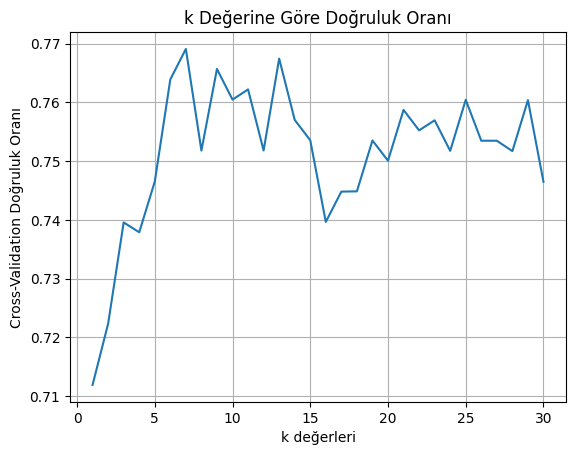

In [ ]:
# Optimal k ile KNN modeli
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(x_train, y_train)

# Tahmin ve doğruluk değerlendirme
y_pred = knn_optimized.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with k={best_k}: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Doğruluk oranı grafiği (isteğe bağlı)
import matplotlib.pyplot as plt
plt.plot(range(1, 31), scores)
plt.xlabel('k değerleri')
plt.ylabel('Cross-Validation Doğruluk Oranı')
plt.title('k Değerine Göre Doğruluk Oranı')
plt.grid()
plt.show()

In [ ]:
y = data["Outcome"]
X_ham_veri = data.drop(["Outcome"], axis=1)

In [ ]:
x = (X_ham_veri - np.min(X_ham_veri)) / (np.max(X_ham_veri) - np.min(X_ham_veri))

In [ ]:
print("normalizasyon öncesi hamveri:\n")
print(X_ham_veri.head())

normalizasyon öncesi hamveri:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("k = 3 için test verilerimizin doğrulama testi sonucu", knn.score(x_test, y_test))

k = 3 için test verilerimizin doğrulama testi sonucu 0.640625


In [ ]:
sayac =1
for k in range(1,31):
  knn_yeni = KNeighborsClassifier(n_neighbors=k)
  knn_model = knn_yeni.fit(x_train, y_train)
  print(sayac, " ", "doğruluk oranı: %", knn_yeni.score(x_test, y_test)*100)
  sayac +=1

1   doğruluk oranı: % 66.66666666666666
2   doğruluk oranı: % 70.83333333333334
3   doğruluk oranı: % 64.0625
4   doğruluk oranı: % 69.27083333333334
5   doğruluk oranı: % 65.625
6   doğruluk oranı: % 69.27083333333334
7   doğruluk oranı: % 68.22916666666666
8   doğruluk oranı: % 70.83333333333334
9   doğruluk oranı: % 71.35416666666666
10   doğruluk oranı: % 71.875
11   doğruluk oranı: % 69.27083333333334
12   doğruluk oranı: % 74.47916666666666
13   doğruluk oranı: % 73.95833333333334
14   doğruluk oranı: % 73.4375
15   doğruluk oranı: % 73.95833333333334
16   doğruluk oranı: % 72.91666666666666
17   doğruluk oranı: % 71.35416666666666
18   doğruluk oranı: % 71.35416666666666
19   doğruluk oranı: % 71.35416666666666
20   doğruluk oranı: % 70.83333333333334
21   doğruluk oranı: % 70.3125
22   doğruluk oranı: % 69.79166666666666
23   doğruluk oranı: % 69.27083333333334
24   doğruluk oranı: % 70.83333333333334
25   doğruluk oranı: % 70.3125
26   doğruluk oranı: % 71.875
27   doğruluk or